In [1]:
%matplotlib inline

import pickle
import numpy as np
import matplotlib.pyplot as plt


In [2]:

filename = "./data/smart_data" 

# Getting back the objects:
with open(filename, 'rb') as f:
    stats, funds_wealth_all_episodes, learning_fund_stats = pickle.load(f)

### Total wealth

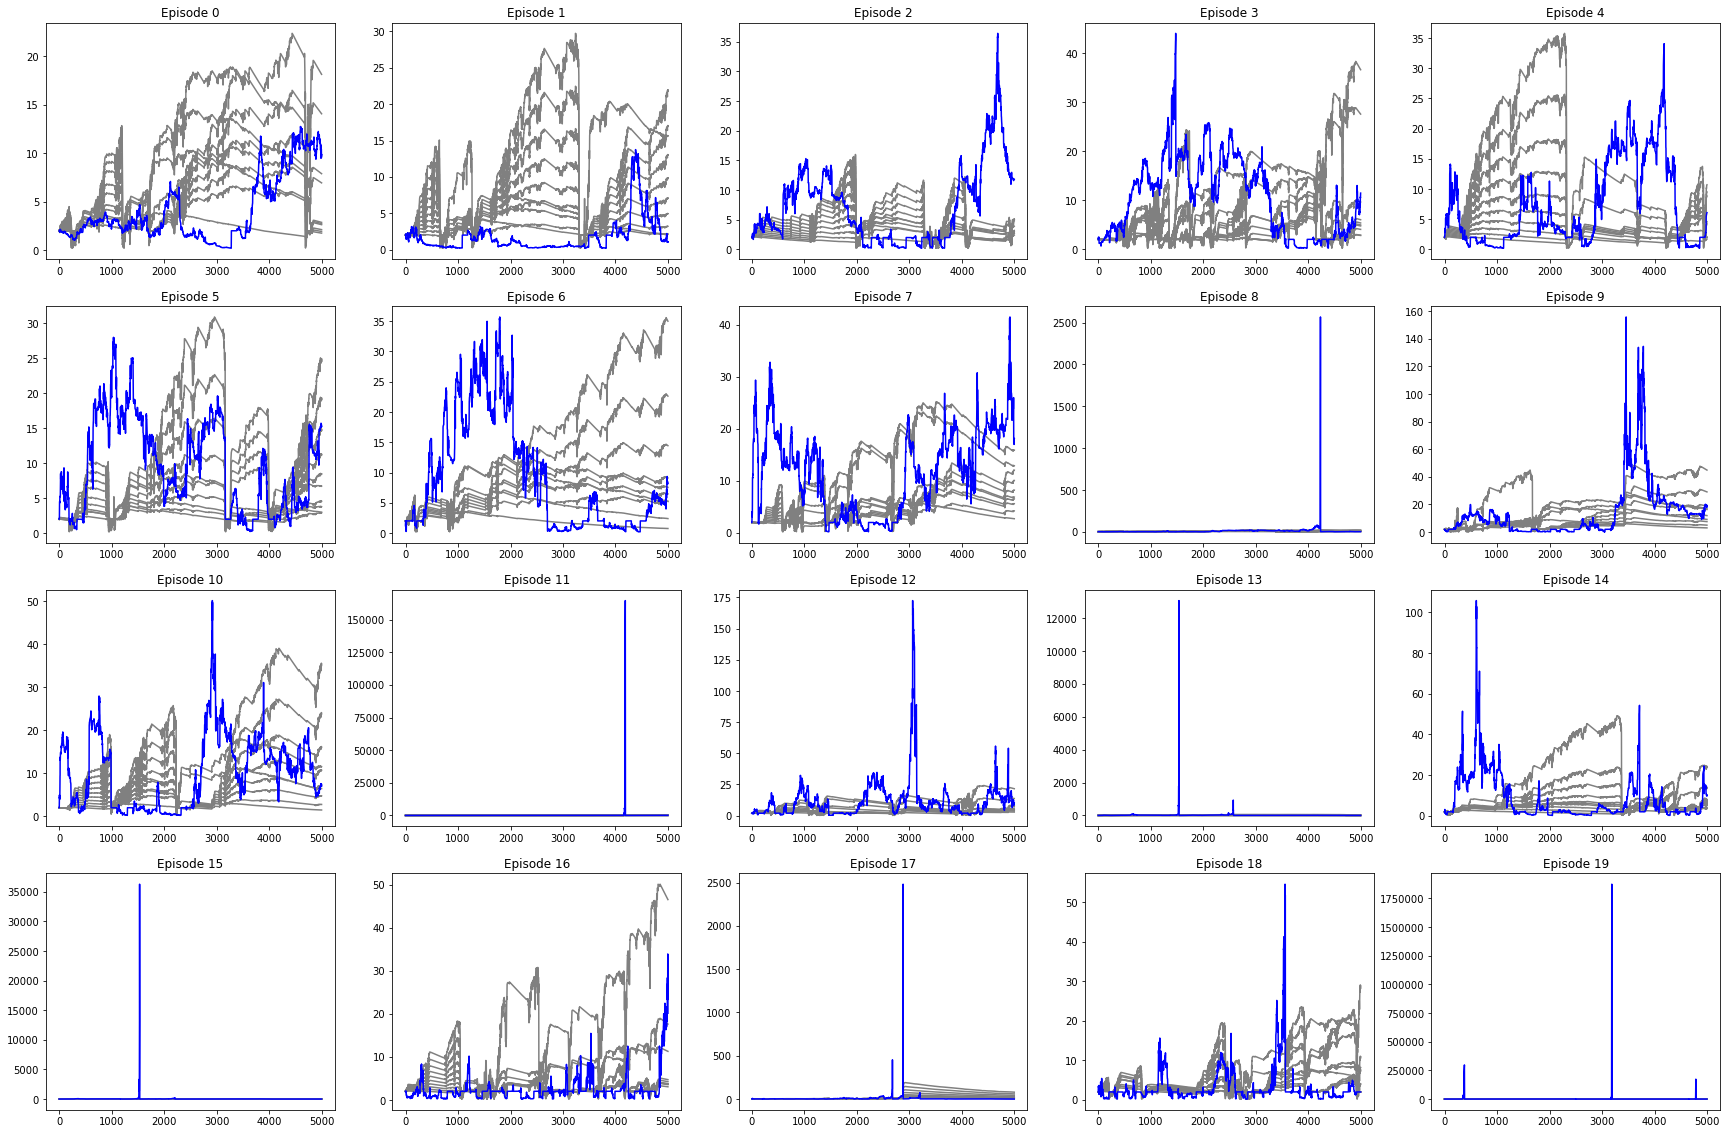

In [15]:
# assumes 10 episodes
fig, axes = plt.subplots(nrows=4, ncols=5,
                         #sharex=True, sharey=True,
                         figsize=(30,20)
                        )

for i, ax in enumerate(axes.flatten()):

    for j in range(11):
        episode = np.array(funds_wealth_all_episodes[i])
        if j == 10:
            ax.plot(episode.T[j], color='blue')
        else:
            ax.plot(episode.T[j], color='gray')
        
    ax.set_title("Episode {}".format(i), #{'fontsize':20}
                )
    
# Fine-tune figure; make subplots farther from each other.
fig.suptitle("", fontsize=30);

# Saving
#fig.savefig("./figures/{}.png".format(experiment_name))

### Learning Fund

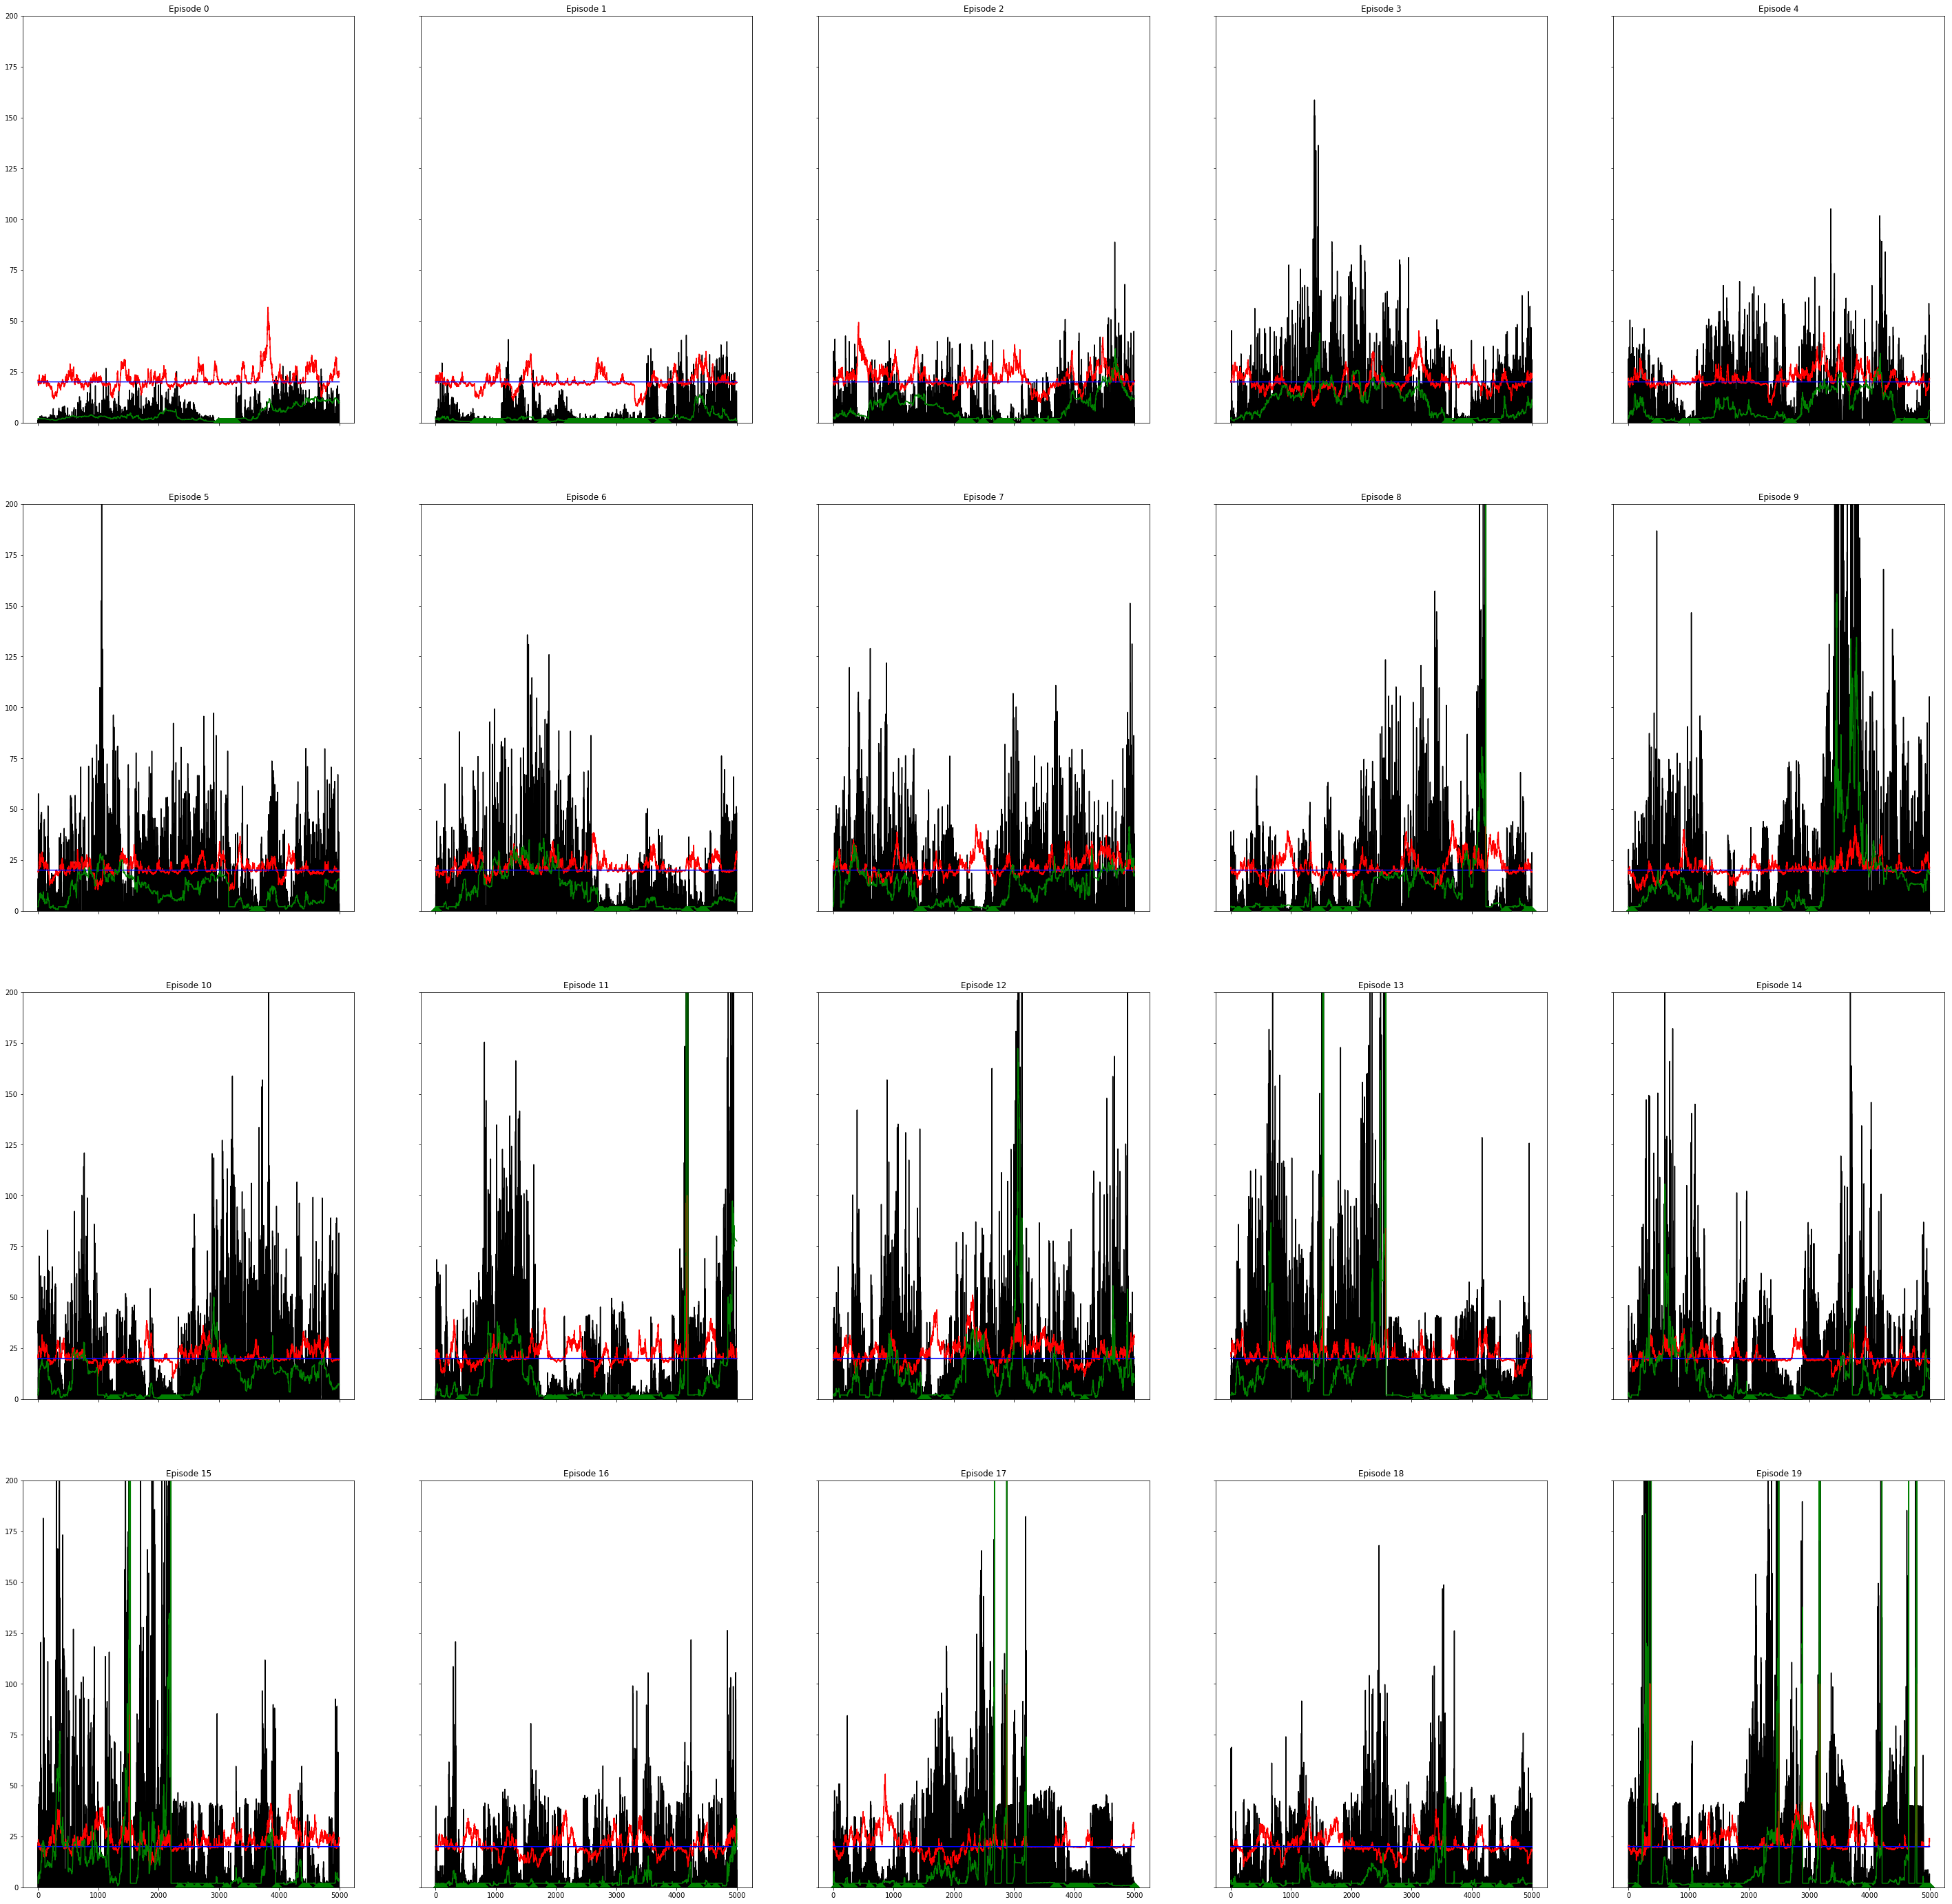

In [48]:
# assumes 30 episodes
fig, axes = plt.subplots(nrows=4, ncols=5,
                         sharex=True,sharey=True,
                         figsize=(50,50)
                        )



for i, ax in enumerate(axes.flatten()):
        
        ax.set_ylim([0,200])
        
        episode = learning_fund_stats[i]
        
        price = episode.T[0]*20
        demand = episode.T[1] 
        wealth = episode.T[2]
        
        ax.plot(demand, color='black')
        
        ax.plot(price, color='red')
        
        # mark fundamental value
        ax.plot(np.linspace(20,20,5000), color='blue')
        
        ax.plot(wealth, 'g')
        
        # mark default cases
        markers_on = [i for i in range(len(wealth)) if wealth[i] <= 0.5]
        ax.plot(np.linspace(0,0,5000), 'gD',
                markersize=10, markevery=markers_on)
        
        ax.plot()
        
        ax.set_title("Episode {}".format(i), #{'fontsize':20}
                    )
    
# Fine-tune figure; make subplots farther from each other.
fig.suptitle("", fontsize=30);

(5000,)


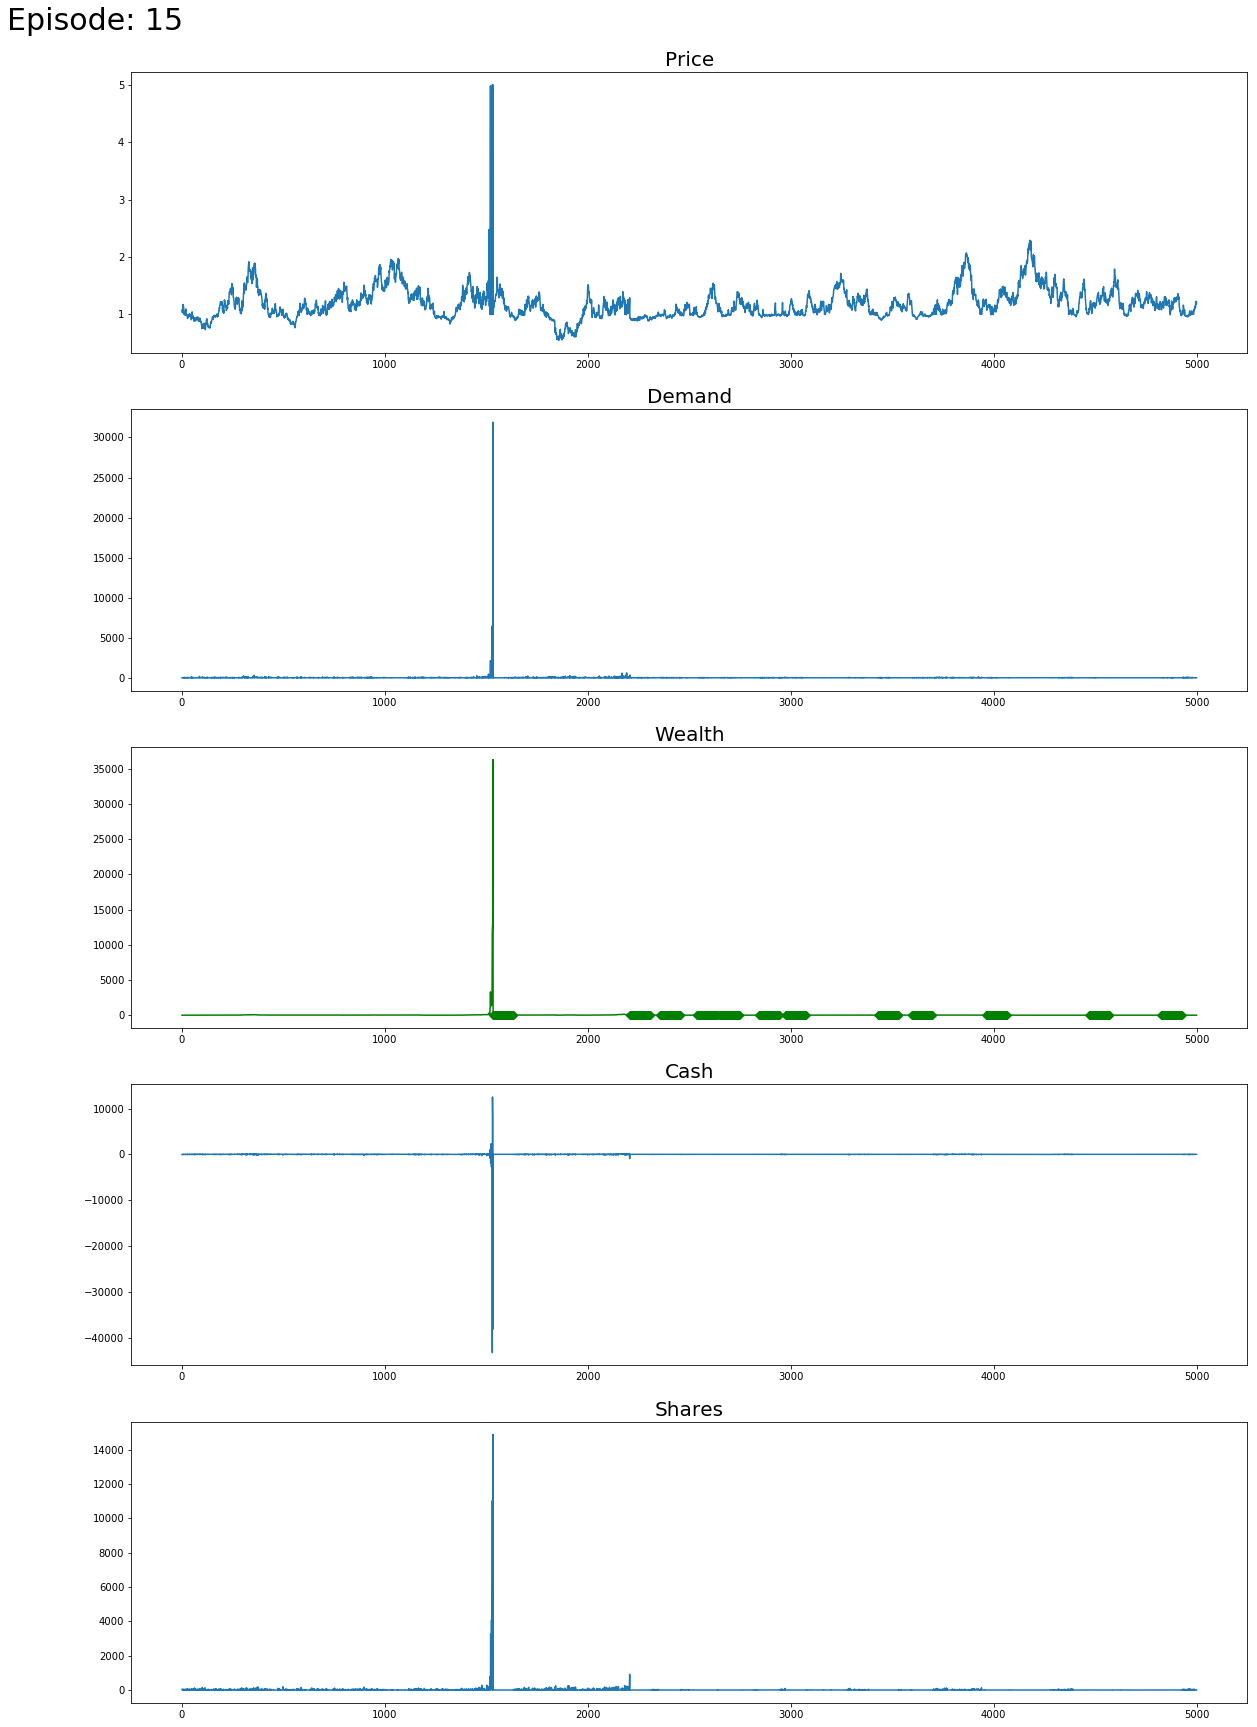

In [49]:
variables = ['Price', 'Demand', 'Wealth', 'Cash', 'Shares']

fig, axes = plt.subplots(nrows=5, ncols=1,figsize=(20,30))

episode_to_look_at = 15 

for i, ax in enumerate(axes.flatten()):
    
    variable = i
    
    episode = learning_fund_stats[episode_to_look_at]
    
    #ax.set_ylim([0,200])
    
    if i == 2:
        print(episode.T[i].shape)
        markers_on = [k for k in range(len(episode.T[i])) if episode.T[i][k] == 2]   
        ax.plot(episode.T[i],'-gD', markersize=5, markevery=markers_on)
    
    else:
        ax.plot(episode.T[i])
        
    ax.set_title(variables[i], {'fontsize':20})
    
# Fine-tune figure; make subplots farther from each other.
fig.suptitle("Episode: {}".format(episode_to_look_at),
             fontsize=30, x=0.1, y=0.91);

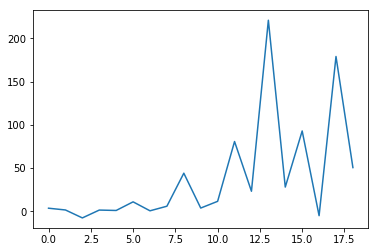

In [50]:
plt.plot(stats[:-1])